# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Load your dataset
#df = pd.read_csv('/content/Salaries.csv')
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1. Basic Data Exploration
Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [4]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print()

print("Column Name | Data Type  | Null Values")
for column in df.columns:
    print(f'{column:<16} | {str(df[column].dtype):<10} | {df[column].isnull().sum()}')

Number of rows:  148654
Number of columns:  13

Column Name | Data Type  | Null Values
Id               | int64      | 0
EmployeeName     | object     | 0
JobTitle         | object     | 0
BasePay          | float64    | 609
OvertimePay      | float64    | 4
OtherPay         | float64    | 4
Benefits         | float64    | 36163
TotalPay         | float64    | 0
TotalPayBenefits | float64    | 0
Year             | int64      | 0
Notes            | float64    | 148654
Agency           | object     | 0
Status           | float64    | 148654


# 2. Descriptive Statistics
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [5]:
salary = np.array(df['TotalPay'])

mean = np.mean(salary)
median = np.median(salary)
mode = statistics.mode(salary)
min = np.min(salary)
max = np.max(salary)
std = np.std(salary)

print(f"Salary Mean: {mean}")
print(f"Salary Median: {median}")
print(f"Salary Mode: {mode}")
print(f"Salary Minimum: {min}")
print(f"Salary Maximum: {max}")
print(f"Salary is in range: {min} -> {max}")
print(f"Salary Standard Deviation: {std}")

Salary Mean: 74768.32197169267
Salary Median: 71426.60999999999
Salary Mode: 0.0
Salary Minimum: -618.13
Salary Maximum: 567595.43
Salary is in range: -618.13 -> 567595.43
Salary Standard Deviation: 50516.83535894512


# 3. Data Cleaning 
Handle missing data by suitable method with explain why you use it.

### Notes on our Data Exploration:
- There are two columns (Notes, Status) with 148,654 null values which is equal to the number of rows, that's why we drop those columns with no data 
- (BasePay, Benefits) has null values which we could replace with 0

In [6]:
# Drop null columns
df = df.drop('Notes', axis=1)
df = df.drop('Status', axis=1)

# Fill null cells with 0
df.fillna(0, inplace=True)

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


# 4. Basic Data Visualization
Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

## Histogram

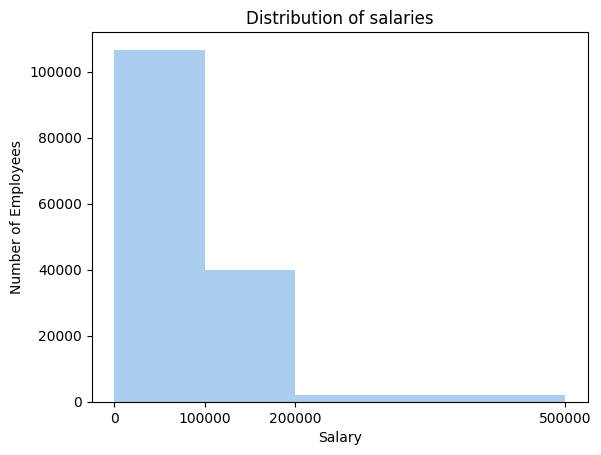

In [7]:
bins = [0, 100_000, 200_000, 500_000]
plt.hist(salary, bins=bins, color="#abcdef")
plt.xticks(bins)

plt.title("Distribution of salaries")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")

plt.show()

## Pie Chart

### Trying to get the departments 
- Show the results of what inside parentheses in the JobTitle column 

In [8]:
def extract_department(job_title):
    start_index = job_title.find('(')
    end_index = job_title.find(')')
    
    if start_index != -1 and end_index != -1:
        return job_title[start_index + 1:end_index].strip()
    else:
        return 'Other Department'

all_departments = df['JobTitle'].apply(extract_department).tolist()

# Print unique departments
set(all_departments)

{'CIVIL & CRIMINAL',
 'CIVIL/CRIMINAL',
 'Civil & Criminal',
 'Civil/Criminal',
 'Cvl&Crmnl',
 'FIRE DEPARTMENT',
 'Fire Department',
 'Fire Dept',
 'MFCC',
 'Other Department',
 'POLICE DEPARTMENT',
 'Police Department',
 'SEASONAL',
 'SFERS',
 'Seasonal'}

- Looking for 3 main departments with considering the case-sensitive of python

In [9]:
departments = []
for dep in all_departments:
    dep = dep.lower()

    if 'police' in dep:
        departments.append('Police') 
    elif 'fire' in dep:
        departments.append('Fire')
    elif 'civil' in dep:
        departments.append('Civil')
    else:
        continue

# Count each department
department_counts = Counter(departments)
department_counts

Counter({'Civil': 1525, 'Police': 712, 'Fire': 78})

### Plot Pie Chart

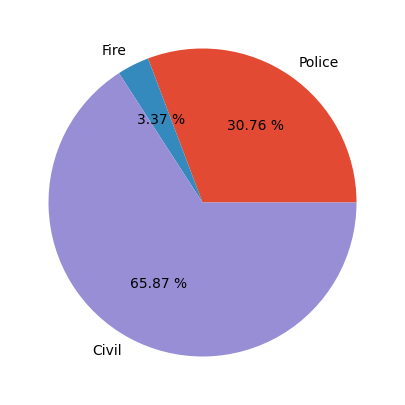

In [12]:
sizes = [department_counts[x] for x in department_counts]
labels = [x for x in department_counts]

plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.pie(sizes, labels=labels, autopct="%.2f %%")

plt.show()

# 5. Grouped Analysis
Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

# 6. Simple Correlation Analysis
Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

# 7. Summary of Insights
Write a brief report summarizing the findings and insights from the analyses.